## Minimize Cost

Hypothesis and Cost

$$ H(x) = Wx + b $$

$$ cost(W, b) = \frac{1}{m}\sum_{i=1}^m(H(x^i) - y^i)^2 $$

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [3]:
# fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 191ms/step - loss: 6.6925
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 3.0467
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 1.4073
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6689
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3352
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1833
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0632
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 13/100
1/1 [==============================] - 0s 3ms/

In [4]:
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

[[-3.9760773]
 [-2.987691 ]]


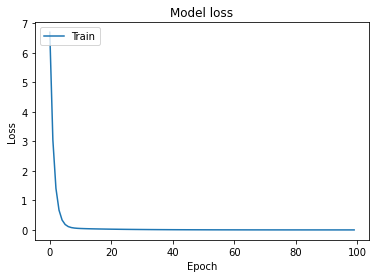

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Multi-variable Linear Regression

In [6]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

In [8]:
tf.model = tf.keras.Sequential()

# input_dim=3 gives multi-variable regression
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3))  
# this line can be omitted, as linear activation is default
tf.model.add(tf.keras.layers.Activation('linear'))  

In [9]:
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = tf.model.fit(x_data, y_data, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5274
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5272
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5270
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5267
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5265
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5262
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5260
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5258
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5256
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5253
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5251
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5249
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

In [12]:
y_predict = tf.model.predict(np.array([[72., 93., 90.]]))
print(y_predict)

[[154.57231]]


## file input

In [13]:
xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [15]:
# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)


In [16]:
print(y_data, "\ny_data shape:", y_data.shape)

[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [17]:
tf.model = tf.keras.Sequential()
# activation function doesn't have to be added as a separate layer. Add it as an argument of Dense() layer
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='linear'))
# tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
history = tf.model.fit(x_data, y_data, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 127ms/step - loss: 7277.5640
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 2704.5571
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 1013.7805
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 388.6468
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 157.5089
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 72.0429
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 40.4356
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 28.7416
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 24.4099
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 22.8003
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 22.1972
Epoch 12/2000
1/1 [==============================] - 0s 2ms/step - loss: 21.9662
Epoch 13/2000
1/1 [========

In [19]:
# Ask my score
print("Your score will be ", tf.model.predict([[100, 70, 101]]))
print("Other scores will be ", tf.model.predict([[60, 70, 110], [90, 100, 80]]))

Your score will be  [[184.7679]]
Other scores will be  [[166.91531]
 [180.25856]]
